[View in Colaboratory](https://colab.research.google.com/github/chug2k/Titanic-Workshop/blob/master/CoderSchool_Workshop.ipynb)

# Welcome to CoderSchool's Workshop.

Today we'll be predicting who lived or died on the HMS Titanic.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Titanic-Cobh-Harbour-1912.JPG/330px-Titanic-Cobh-Harbour-1912.JPG)

If these steps are new to you, don't worry, the isntructor will help. 

## Initialization Code

Here we'll just do a few simple things to download our data and load it. Don't worry about this step too much; just click "run" and you'll be done with it.

To print your data, use `head`.

```
full_data.head()
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
!wget https://raw.githubusercontent.com/chug2k/Titanic-Workshop/master/titanic_visualizations.py
!wget https://raw.githubusercontent.com/chug2k/Titanic-Workshop/master/train.csv
from titanic_visualizations import survival_stats

# Load the dataset
in_file = 'train.csv'
full_data = pd.read_csv(in_file)

--2018-07-12 11:33:00--  https://raw.githubusercontent.com/chug2k/Titanic-Workshop/master/titanic_visualizations.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5424 (5.3K) [text/plain]
Saving to: ‘titanic_visualizations.py.4’

titanic_visualizati 100%[===================>]   5.30K  --.-KB/s    in 0s      

2018-07-12 11:33:00 (59.1 MB/s) - ‘titanic_visualizations.py.4’ saved [5424/5424]

--2018-07-12 11:33:01--  https://raw.githubusercontent.com/chug2k/Titanic-Workshop/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# I'm about to print out some code. 

full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleanup

One common thing you'll have to do is _data engineering_. Here, we'll do a simple trivial example where we'll remove the "Survived" column from our dataset, and save it under "outcomes". We're doing this because that's the column we want to predict. 

Below we've also defined a utility function to predict scores.

In [3]:
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)
data.head()

def accuracy_score(truth, pred, name):
    """ Returns accuracy score for input truth and predictions. """

    if len(truth) == len(pred):
        # Calculate and return the accuracy as a percent
        # {:2f}.format((truth == pred).mean()*100)
        # ":" represents format specification
        # "2f" represents 2 decimal places
        return "{} Predictions have an accuracy of {:.2f}.".format(name, (truth == pred).mean()*100)
    else:
        return "Number of predictions does not match number of outcomes!"



In [7]:
def predict_everyone_survives():
  predictions = []
  for index, passenger in data.iterrows():
    predictions.append(1)
  return predictions

predictions = predict_everyone_survives()
accuracy_score(outcomes, predictions, "Everyone Survives")

def predict_everyone_dies():
  predictions = []
  for index, passenger in data.iterrows():
    predictions.append(0)
  return predictions


  

predictions = predict_everyone_dies()
accuracy_score(outcomes, predictions, "Everyone Dies")


'Everyone Dies Predictions have an accuracy of 61.62.'

## Exploring Data

We have a utility graph function called survival_stats. Let's use it and explore a few different features...

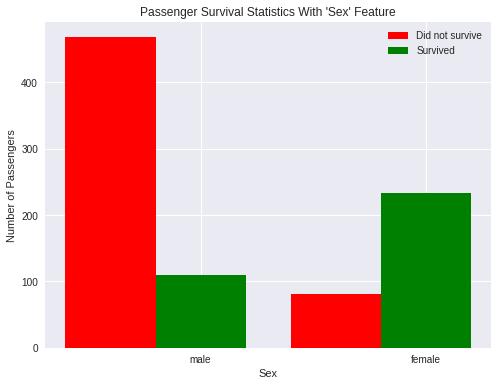

In [11]:
survival_stats(data, outcomes, 'Sex')

In [0]:
def predict_men_died():
   """ Model with one feature: 
            - Predict a passenger survived if they are female. """
   predictions = []
   for index, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)

            return pd.Series(predictions)

# Make the predictions
predictions = predict_men_died()
print(accuracy_score(outcomes, predictions, "Men Died"))


## Simple Warmup Exercise: Write code to predict that all women died.


In [0]:
def predict_women_died():
      """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """

    predictions = []
    for index, passenger in data.iterrows():
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        pass

    # Return our predictions
    return pd.Series(predictions)
  
predictions = predict_women_died()
print(accuracy_score(outcomes, predictions, "Women Died"))

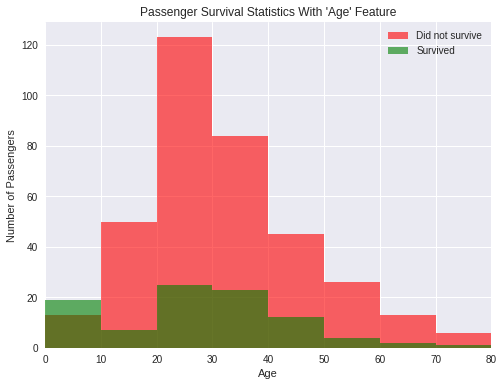

In [12]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

## Second Exercise

Looks like there's a strong correlation with age, for men.  Can you create a new function that returns a prediction that takes a man's age into account?

In summary:
* Women Survive.
* Men who are older than 10 died.

In [0]:
def predictions_2():
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """

    predictions = []
    for index, passenger in data.iterrows():
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        pass

    # Return our predictions
    return pd.Series(predictions)
  
predictions = predictions_2()
print(accuracy_score(outcomes, predictions, "Men Over 10 Died"))

## Final Exercise - Getting to 80%

Exploring the data, I'm going to add one more attribute: Pclass. Looks like the rich people survived. 

In [0]:
survival_stats(data, outcomes, 'Pclass')

def predictions_3():
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """

    predictions = []
    for index, passenger in data.iterrows():
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif (passenger['Sex'] == 'male') & (passenger['Age'] < 10) & (passenger['Pclass'] < 3):
            predictions.append(1)
        else:
            predictions.append(0)


    # Return our predictions
    return pd.Series(predictions)
  
predictions = predictions_3()
print(accuracy_score(outcomes, predictions, "Men Over 10 Died"))

## Reflection

I think our classifier works, evidenced by the famous movie. Jack was PClass 3, Male, and over 10. 

![alt text](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/titanic-jack-1485877267.gif?crop=1xw:1xh;center,top&resize=480:*)

Rose was female, PClass 1. She had a good chance to survive. 

We could have skipped watching the movie and predicted the outcome from the beginning.